# PORTRAIT ANALYSIS OF AVERAGE SWIMMING ATHELETE

Nowadays swimming is becoming more and more popular. The most famous Olympic champion is also swimmer Michael Phelps. However, there is stereotype that only tall athletes can become Olympic champion in swimming.
That is why the goal of this work is to create portrait of an average swimmer athlete.
To achieve the goal of this work, the following tasks were set:
1. Cleaning and preparing data.
2. Finding correlation between year of Olympic games and Height(Weight).
3. Finding correlation between distance and Height(Weight).
4. Pridiction of Olympic Games 2020 results. 
To achieve the objectives and goals in this work, we use the pandas library for working with tabular data. In addition, we will use numpy library for working with arrays and mathematic computations and matplotlib for plotting graphs. In this work we will use well-know Olimpic Dataset and create new dataset with results from official Olimpic site.

### Import Data

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

file_path = 'athlete_events.csv'

df = pd.read_csv(file_path, index_col=False)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Cleaning and preparing data

### Drop unnecessary data

We can see that we have unnecessary columns such Games, Team, Sport and Season. It happened because we will use only swimming results.

In [2]:
df = df[df['Sport']=='Swimming']
df = df.drop(['Team', 'Games', 'Sport', 'Season'], axis=1)
df.Name = df.Name.str.upper()

In [3]:
df.Event.unique()

array(["Swimming Men's 400 metres Freestyle",
       "Swimming Men's 200 metres Breaststroke",
       "Swimming Men's 400 metres Breaststroke",
       "Swimming Men's 100 metres Butterfly",
       "Swimming Men's 200 metres Butterfly",
       "Swimming Men's 4 x 100 metres Medley Relay",
       "Swimming Men's 100 metres Freestyle",
       "Swimming Men's 4 x 200 metres Freestyle Relay",
       "Swimming Men's 50 metres Freestyle",
       "Swimming Men's 100 metres Backstroke",
       "Swimming Women's 100 metres Backstroke",
       "Swimming Women's 200 metres Backstroke",
       "Swimming Women's 4 x 100 metres Medley Relay",
       "Swimming Women's 50 metres Freestyle",
       "Swimming Men's 200 metres Freestyle",
       "Swimming Men's 4 x 100 metres Freestyle Relay",
       "Swimming Men's 200 metres Backstroke",
       "Swimming Men's 200 metres Individual Medley",
       "Swimming Men's 400 metres Individual Medley",
       "Swimming Women's 4 x 100 metres Freestyle Relay",
  

Also we can notice that our dataset contain some experimental distances such as as 'men 220 yard freestyle'. We should drop them.

In [4]:
disciplines = ["Swimming Men's 220 yard Freestyle",
       "Swimming Men's 880 yard Freestyle",
       "Swimming Men's One Mile Freestyle",
       "Swimming Men's 4 x 50 Yard Freestyle Relay",
       "Swimming Men's Plunge For Distance",
       "Swimming Women's 10 kilometres Open Water",
       "Swimming Men's 1,200 metres Freestyle",
       "Swimming Men's 10 kilometres Open Water",
       "Swimming Men's 4 x 250 metres Freestyle Relay",
       "Swimming Women's 300 metres Freestyle",
       "Swimming Men's 200 metres Obstacle Course",
       "Swimming Men's 200 metres Team Swimming",
       "Swimming Men's 100 Yard Backstroke",
       "Swimming Men's 440 Yard Breaststroke",
       "Swimming Men's 1,000 metres Freestyle",
       "Swimming Men's 50 yard Freestyle",
       "Swimming Men's 100 yard Freestyle",
       "Swimming Men's 440 yard Freestyle",
       "Swimming Men's 100 metres Freestyle For Sailors",
       "Swimming Men's 500 metres Freestyle", "Swimming Men's 4,000 metres Freestyle",
       "Swimming Men's Underwater Swimming",
       "Swimming Men's 4 x 100 metres Medley Relay",
       "Swimming Men's 4 x 200 metres Freestyle Relay",
       "Swimming Women's 4 x 100 metres Medley Relay",
       "Swimming Men's 4 x 100 metres Freestyle Relay",
       "Swimming Women's 4 x 200 metres Freestyle Relay",
       "Swimming Women's 4 x 100 metres Freestyle Relay",
       "Swimming Men's 400 metres Breaststroke", "Swimming Women's 400 metres Breaststroke",]
dropped  = df[df['Event'].isin(disciplines)].index
df = df.drop(dropped, axis=0)
df.reset_index(inplace=True)

We can see that after this action. We have not information about 1904 Olympic Games, because all distancies was measured by yards.

In [5]:
df.Year.unique()

array([1952, 1912, 1920, 1924, 1996, 2000, 1936, 2004, 2008, 1948, 1984,
       1980, 1968, 1988, 1972, 1956, 2016, 1976, 1900, 1992, 2012, 1932,
       1964, 1906, 1960, 1908, 1896, 1928], dtype=int64)

Our dataset does not contain information about result. if we want download results from official site of Olympic Games, we should transform our columns for parsing, because links of result use such format: https://www.olympic.org/beijing-2008/swimming/200m-individual-medley-men

In [6]:
df['City'] = df['City'].str.lower()
df['City'] = df['City'].str.replace('melbourne', 'melbourne-stockholm')
df['City'] = df['City'].str.replace('athina', 'athens')
df['City'] = df['City'].str.replace('moskva', 'moscow')
df['City'] = df['City'].str.replace('roma', 'rome')
df['City'] = df['City'].str.replace(' ', '-')
df['City'] = df['City'].str.replace('rio-de-janeiro', 'rio')
df['City'] = df['City'].str.replace('mexico-city', 'mexico')
df['City'] = df['City'].str.replace('antwerpen', 'antwerp')
df['Event'] = df['Event'].str.lower()
year = df['Year'].apply(str)
df['Games'] = df['City'] + '-' + year
df.head()

,index,ID,Name,Sex,Age,Height,Weight,NOC,Year,City,Event,Medal,Games
0,29,10,"EINAR FERDINAND ""EINARI"" AALTO",M,26.0,NaN,NaN,FIN,1952,helsinki,swimming men's 400 metres freestyle,NaN,helsinki-1952
1,35,15,ARVO OSSIAN AALTONEN,M,22.0,NaN,NaN,FIN,1912,stockholm,swimming men's 200 metres breaststroke,NaN,stockholm-1912
2,37,15,ARVO OSSIAN AALTONEN,M,30.0,NaN,NaN,FIN,1920,antwerp,swimming men's 200 metres breaststroke,Bronze,antwerp-1920
3,39,15,ARVO OSSIAN AALTONEN,M,34.0,NaN,NaN,FIN,1924,paris,swimming men's 200 metres breaststroke,NaN,paris-1924
4,100,36,STEFAN REMCO AARTSEN,M,21.0,194.0,78.0,NED,1996,atlanta,swimming men's 100 metres butterfly,NaN,atlanta-1996


In [7]:
dropped  = df[(df['Year'] == 1906) & (df['City'] == 'athens')].index
df = df.drop(dropped, axis=0)
df.reset_index(inplace=True)

In [8]:
df['Event'] = df['Event'].str.replace(' metres', 'm')
df['Event'] = df['Event'].str[9:]
df['Event'] = df['Event'].str.replace("men's", 'men')
df['Event'] = df['Event'].str.replace("women's", 'women')
df.head()

,level_0,index,ID,Name,Sex,Age,Height,Weight,NOC,Year,City,Event,Medal,Games
0,0,29,10,"EINAR FERDINAND ""EINARI"" AALTO",M,26.0,NaN,NaN,FIN,1952,helsinki,men 400m freestyle,NaN,helsinki-1952
1,1,35,15,ARVO OSSIAN AALTONEN,M,22.0,NaN,NaN,FIN,1912,stockholm,men 200m breaststroke,NaN,stockholm-1912
2,2,37,15,ARVO OSSIAN AALTONEN,M,30.0,NaN,NaN,FIN,1920,antwerp,men 200m breaststroke,Bronze,antwerp-1920
3,3,39,15,ARVO OSSIAN AALTONEN,M,34.0,NaN,NaN,FIN,1924,paris,men 200m breaststroke,NaN,paris-1924
4,4,100,36,STEFAN REMCO AARTSEN,M,21.0,194.0,78.0,NED,1996,atlanta,men 100m butterfly,NaN,atlanta-1996


In [9]:
a = df['Event'].str.split()
b = []
for i in a: 
    if len(i) == 3:
        b.append('-'.join([i[1], i[2], i[0]]))
    if len(i) == 6:
        b.append('-'.join([''.join([i[1], i[2], i[3]]), i[4], i[5], i[0]]))
    if len(i) == 4:
        b.append('-'.join([i[1], i[2], i[3], i[0]]))

In [10]:
df['Event'] = b
df.head()

,level_0,index,ID,Name,Sex,Age,Height,Weight,NOC,Year,City,Event,Medal,Games
0,0,29,10,"EINAR FERDINAND ""EINARI"" AALTO",M,26.0,NaN,NaN,FIN,1952,helsinki,400m-freestyle-men,NaN,helsinki-1952
1,1,35,15,ARVO OSSIAN AALTONEN,M,22.0,NaN,NaN,FIN,1912,stockholm,200m-breaststroke-men,NaN,stockholm-1912
2,2,37,15,ARVO OSSIAN AALTONEN,M,30.0,NaN,NaN,FIN,1920,antwerp,200m-breaststroke-men,Bronze,antwerp-1920
3,3,39,15,ARVO OSSIAN AALTONEN,M,34.0,NaN,NaN,FIN,1924,paris,200m-breaststroke-men,NaN,paris-1924
4,4,100,36,STEFAN REMCO AARTSEN,M,21.0,194.0,78.0,NED,1996,atlanta,100m-butterfly-men,NaN,atlanta-1996


### Working with values

We can notice that we have categorical data in our dataset such Medal and Sex. We transformed these columns such way 'Bronze':1, 'Silver': 1, 'Gold': 1 and 'M':1, 'F':0.

In [11]:
df['Sex'] = df['Sex'].map({'M':1, 'F':0})
class_mapping = {
    'Bronze':1,
    'Silver': 1,
    'Gold': 1
}
df['Medal'] = df['Medal'].map(class_mapping)
df['Medal'] = df['Medal'].fillna(0)
df = df.astype({'Medal': 'int32'})
df = df.drop(['level_0'], axis=1)
df.head()

,index,ID,Name,Sex,Age,Height,Weight,NOC,Year,City,Event,Medal,Games
0,29,10,"EINAR FERDINAND ""EINARI"" AALTO",1,26.0,NaN,NaN,FIN,1952,helsinki,400m-freestyle-men,0,helsinki-1952
1,35,15,ARVO OSSIAN AALTONEN,1,22.0,NaN,NaN,FIN,1912,stockholm,200m-breaststroke-men,0,stockholm-1912
2,37,15,ARVO OSSIAN AALTONEN,1,30.0,NaN,NaN,FIN,1920,antwerp,200m-breaststroke-men,1,antwerp-1920
3,39,15,ARVO OSSIAN AALTONEN,1,34.0,NaN,NaN,FIN,1924,paris,200m-breaststroke-men,0,paris-1924
4,100,36,STEFAN REMCO AARTSEN,1,21.0,194.0,78.0,NED,1996,atlanta,100m-butterfly-men,0,atlanta-1996


After this we splitted data between Male and Female, because they have different values of height and weight.

In [12]:
df_male = df[df['Sex']==1]
df_female = df[df['Sex']==0]

df_male.reset_index(inplace=True)
df_male = df_male.drop(['index', 'level_0', 'Sex'], axis=1)

df_female.reset_index(inplace=True)
df_female = df_female.drop(['index', 'level_0', 'Sex'], axis=1)

We can notice that male dataset has 2093 Nan values and female dataset has 1003 Nan values. We replaced these values by median of column.

In [13]:
df_male.isna().sum()

ID           0
Name         0
Age        269
Height    1929
Weight    2093
NOC          0
Year         0
City         0
Event        0
Medal        0
Games        0
dtype: int64

In [14]:
df_male.shape

(9268, 11)

In [15]:
df_female.isna().sum()

ID           0
Name         0
Age         67
Height     924
Weight    1003
NOC          0
Year         0
City         0
Event        0
Medal        0
Games        0
dtype: int64

In [16]:
df_female.shape

(7012, 11)

In female data there are only 14% of NaN values. In male data there are 21.7% of NaN values. That means that we should imput them.

In [17]:
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN', strategy='median', axis=0)#most_frequent
imr = imr.fit(df_female[['Age', 'Height', 'Weight']])
imputed_data = imr.transform(df_female[['Age', 'Height', 'Weight']].values)

df1 = pd.DataFrame(data=imputed_data, columns=['Age', 'Height', 'Weight'])
df_female[['Age', 'Height', 'Weight']] = df1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [18]:
imr = Imputer(missing_values='NaN', strategy='median', axis=0)
imr = imr.fit(df_male[['Age', 'Height', 'Weight']])
imputed_data = imr.transform(df_male[['Age', 'Height', 'Weight']].values)

df1 = pd.DataFrame(data=imputed_data, columns=['Age', 'Height', 'Weight'])
df_male[['Age', 'Height', 'Weight']] = df1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Let's find out any correlations and statistics in our dataset

In [19]:
df_male.corr()

,ID,Age,Height,Weight,Year,Medal
ID,1.000000,0.025634,0.016333,0.037056,0.009142,0.020188
Age,0.025634,1.000000,0.214216,0.254992,0.163153,0.017983
Height,0.016333,0.214216,1.000000,0.753113,0.203921,0.094573
Weight,0.037056,0.254992,0.753113,1.000000,0.174285,0.104979
Year,0.009142,0.163153,0.203921,0.174285,1.000000,-0.063270
Medal,0.020188,0.017983,0.094573,0.104979,-0.063270,1.000000


In [20]:
df_female.corr()

,ID,Age,Height,Weight,Year,Medal
ID,1.000000,-0.008682,0.027439,0.047553,0.008494,-0.001958
Age,-0.008682,1.000000,0.254344,0.233837,0.303360,0.037533
Height,0.027439,0.254344,1.000000,0.717753,0.223895,0.095022
Weight,0.047553,0.233837,0.717753,1.000000,0.147966,0.104183
Year,0.008494,0.303360,0.223895,0.147966,1.000000,-0.064859
Medal,-0.001958,0.037533,0.095022,0.104183,-0.064859,1.000000


In [21]:
df_male[df_male.Medal == 1][['Height', 'Weight']].describe()

,Height,Weight
count,689.000000,689.000000
mean,186.142235,80.082729
std,7.503881,7.980881
min,152.000000,54.000000
25%,183.000000,76.000000
50%,185.000000,78.000000
75%,191.000000,85.000000
max,203.000000,105.000000


In [22]:
df_male[df_male.Medal == 0][['Height', 'Weight']].describe()

,Height,Weight
count,8579.000000,8579.000000
mean,183.589929,77.053969
std,7.010845,7.489808
min,147.000000,45.000000
25%,180.000000,73.000000
50%,184.000000,77.000000
75%,187.000000,81.000000
max,209.000000,112.000000


We can notice obvious correlation between Height and Weight

In [23]:
df_female[df_female.Medal == 1][['Height', 'Weight']].describe()

,Height,Weight
count,616.000000,616.000000
mean,172.949675,63.128247
std,6.330394,5.706204
min,142.000000,48.000000
25%,170.000000,60.000000
50%,172.000000,63.000000
75%,176.000000,66.000000
max,192.000000,85.000000


In [24]:
df_female[df_female.Medal == 0][['Height', 'Weight']].describe()

,Height,Weight
count,6396.000000,6396.000000
mean,170.742026,60.868433
std,6.568391,6.144794
min,131.000000,39.000000
25%,167.000000,57.000000
50%,171.000000,61.000000
75%,175.000000,64.000000
max,193.000000,85.000000


## Finding correlation between year of Olympic games and Height(Weight).

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Male

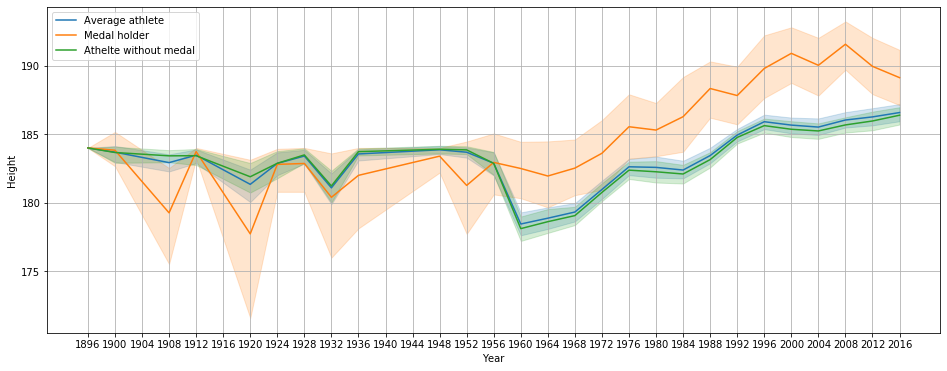

In [26]:
plt.figure(figsize=(16,6))
plt.xticks(np.arange(min(df_male.Year), max(df_male.Year)+1, 4))
plt.grid()
sns.lineplot(y=df_male.Height, x=df_male.Year, label="Average athlete")
sns.lineplot(y=df_male[df_male.Medal==1].Height, x=df_male[df_male.Medal==1].Year, label="Medal holder")
sns.lineplot(y=df_male[df_male.Medal==0].Height, x=df_male[df_male.Medal==0].Year, label="Athelte without medal")

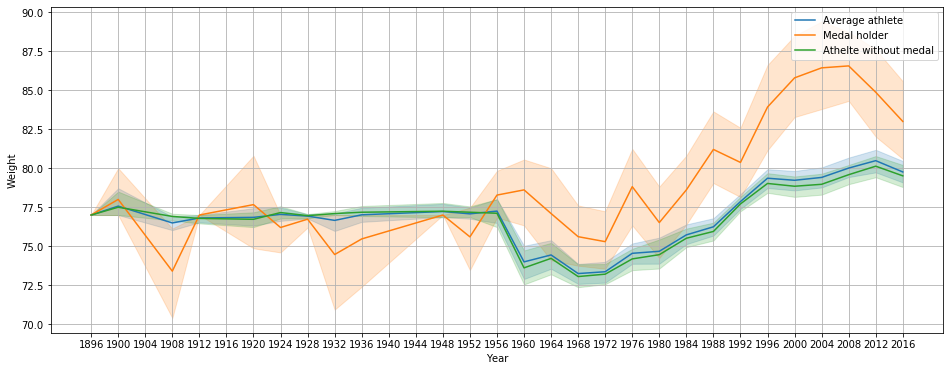

In [27]:
plt.figure(figsize=(16,6))
plt.xticks(np.arange(min(df_male.Year), max(df_male.Year)+1, 4))
plt.grid()
sns.lineplot(y=df_male.Weight, x=df_male.Year, label="Average athlete")
sns.lineplot(y=df_male[df_male.Medal==1].Weight, x=df_male[df_male.Medal==1].Year, label="Medal holder")
sns.lineplot(y=df_male[df_male.Medal==0].Weight, x=df_male[df_male.Medal==0].Year, label="Athelte without medal")

We can notice that in 1960 was strange falling of Height(Weight). We can notice that in 1960 was strange falling of Height(Weight). Let's Figure out. For more detailed analysis, we build graph of correlation between year and number of countries on Olympic Games, graph of correlation between country and height and graph of correlation between year and number of participants

In [28]:
df_male[df_male['Year'] == 1960].describe()

,ID,Age,Height,Weight,Year,Medal
count,234.000000,234.000000,234.000000,234.000000,234.0,234.000000
mean,66108.388889,20.188034,178.452991,73.995726,1960.0,0.076923
std,38300.075477,3.020478,6.885945,8.099964,0.0,0.267041
min,3008.000000,14.000000,160.000000,52.000000,1960.0,0.000000
25%,32498.750000,18.000000,174.000000,68.000000,1960.0,0.000000
50%,62409.500000,20.000000,178.500000,74.000000,1960.0,0.000000
75%,101384.500000,22.000000,183.000000,79.000000,1960.0,0.000000
max,133771.000000,32.000000,196.000000,93.000000,1960.0,1.000000


In [30]:
l = []
for i in df_male.Year.unique():
    l.append(df_male[(df_male['Year'] == i)].NOC.unique().shape[0])

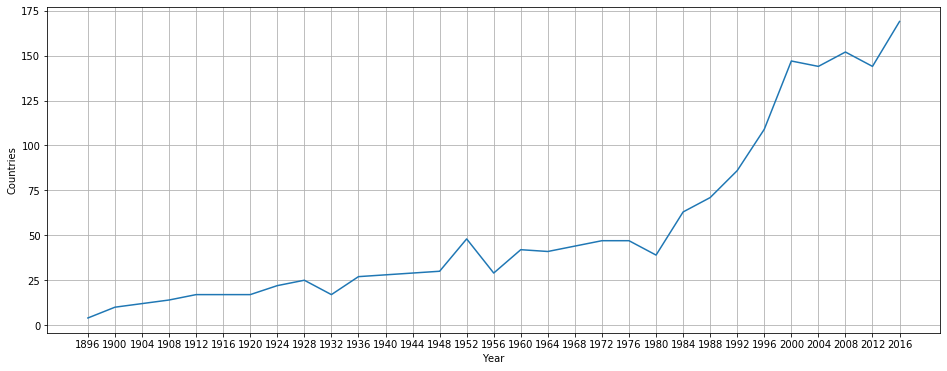

In [31]:
plt.figure(figsize=(16,6))
plt.xticks(np.arange(min(df_male.Year), max(df_male.Year)+1, 4))
plt.ylabel("Countries")
plt.xlabel("Year")
plt.grid()
sns.lineplot(y=l, x=df_male.Year.unique())

In [32]:
l = []
for i in df_male.Year.unique():
    l.append(df_male[(df_male['Year'] == i)].NOC.count())

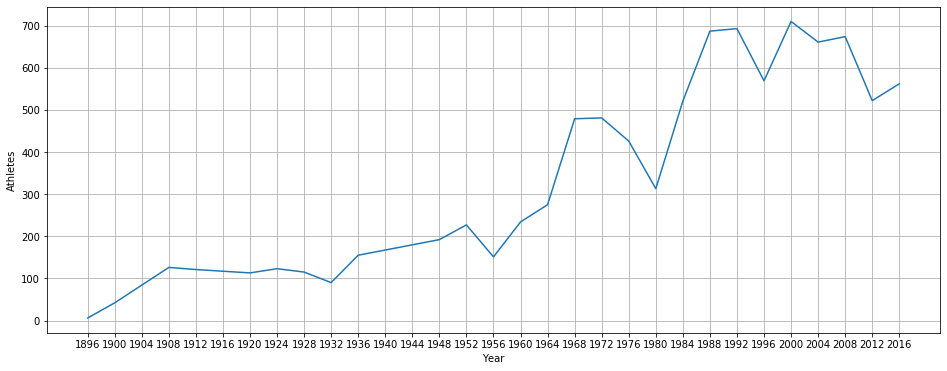

In [33]:
plt.figure(figsize=(16,6))
plt.xticks(np.arange(min(df_male.Year), max(df_male.Year)+1, 4))
plt.ylabel("Athletes")
plt.xlabel("Year")
plt.grid()
sns.lineplot(y=l, x=df_male.Year.unique())

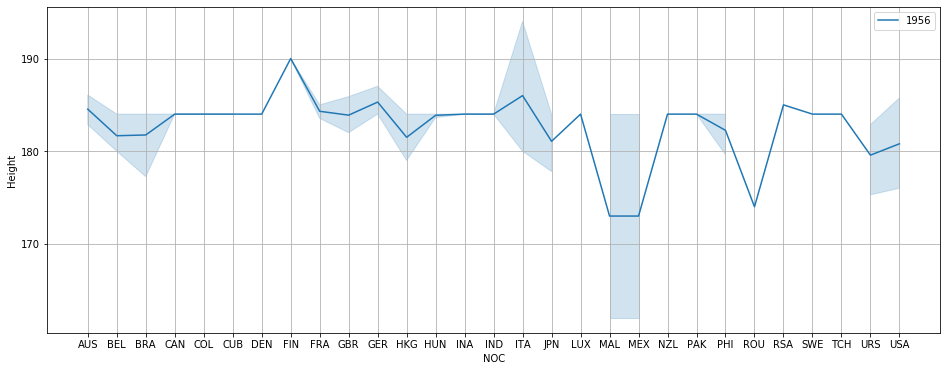

In [34]:
plt.figure(figsize=(16,6))
plt.yticks(np.arange(120, 200, 10))
plt.grid()
sns.lineplot(x=df_male[df_male.Year==1956].NOC, y=df_male[df_male.Year==1956].Height, label='1956')

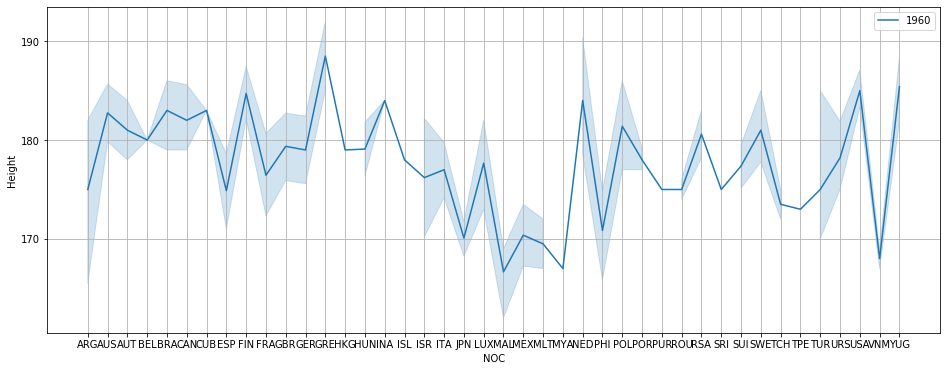

In [35]:
plt.figure(figsize=(16,6))
plt.yticks(np.arange(120, 200, 10))
plt.grid()
sns.lineplot(x=df_male[df_male.Year==1960].NOC, y=df_male[df_male.Year==1960].Height, label='1960')

We can notice that numbers of athetes constantly growd in this pediod. But in 1960 Vietnam and Malaysia took part in Olimpic games. This is countries with low average height.

Also it connected with growth of numbers of athetes. For example, instead of 2 the most heights athletes in 1956, Finland sended 16 atheletes which are not so tall. 


### Famale

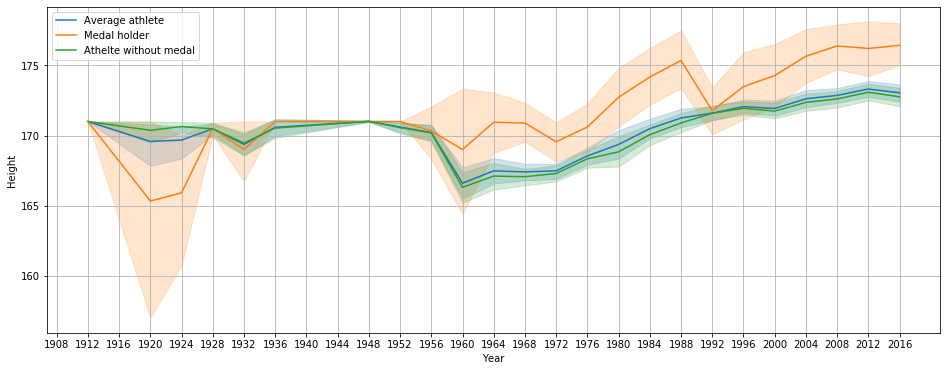

In [36]:
plt.figure(figsize=(16,6))
plt.xticks(np.arange(min(df_male.Year), max(df_male.Year)+1, 4))
plt.grid()
sns.lineplot(y=df_female.Height, x=df_female.Year, label="Average athlete")
sns.lineplot(y=df_female[df_female.Medal==1].Height, x=df_female[df_female.Medal==1].Year, label="Medal holder")
sns.lineplot(y=df_female[df_female.Medal==0].Height, x=df_female[df_female.Medal==0].Year, label="Athelte without medal")

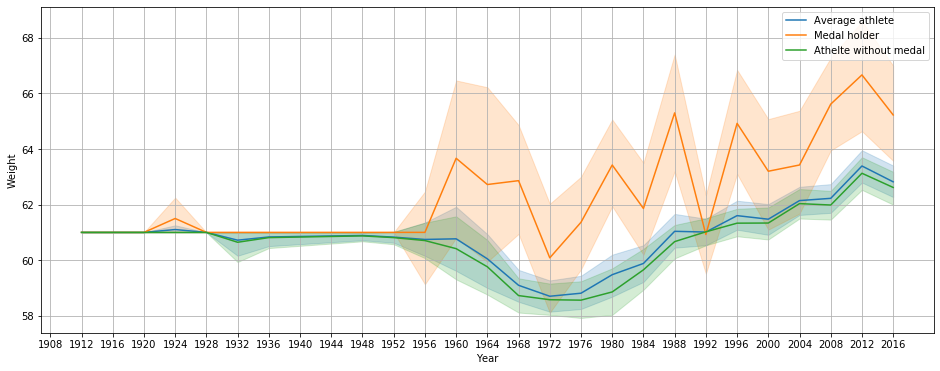

In [37]:
plt.figure(figsize=(16,6))
plt.xticks(np.arange(min(df_male.Year), max(df_male.Year)+1, 4))
plt.grid()
sns.lineplot(y=df_female.Weight, x=df_female.Year, label="Average athlete")
sns.lineplot(y=df_female[df_female.Medal==1].Weight, x=df_female[df_female.Medal==1].Year, label="Medal holder")
sns.lineplot(y=df_female[df_female.Medal==0].Weight, x=df_female[df_female.Medal==0].Year, label="Athelte without medal")

In conclusion, we can notice tendency, that medal holder is higher than athlete without medal.
## Findig correlation between distance and Height(Weight)

Male

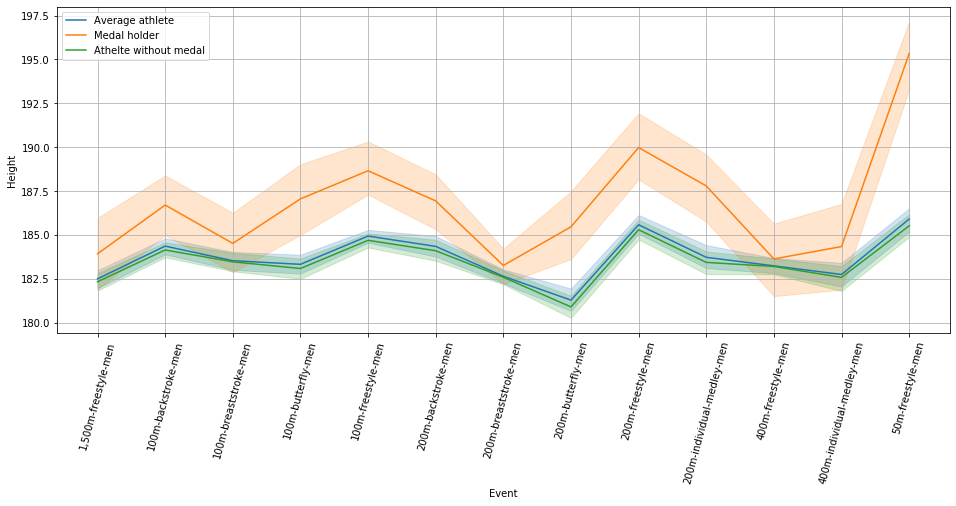

In [38]:
plt.figure(figsize=(16,6))
plt.grid()
plt.xticks(rotation=75)
sns.lineplot(y=df_male.Height, x=df_male.Event, label="Average athlete")
sns.lineplot(y=df_male[df_male.Medal==1].Height, x=df_male[df_male.Medal==1].Event, label="Medal holder")
sns.lineplot(y=df_male[df_male.Medal==0].Height, x=df_male[df_male.Medal==0].Event, label="Athelte without medal")

Female

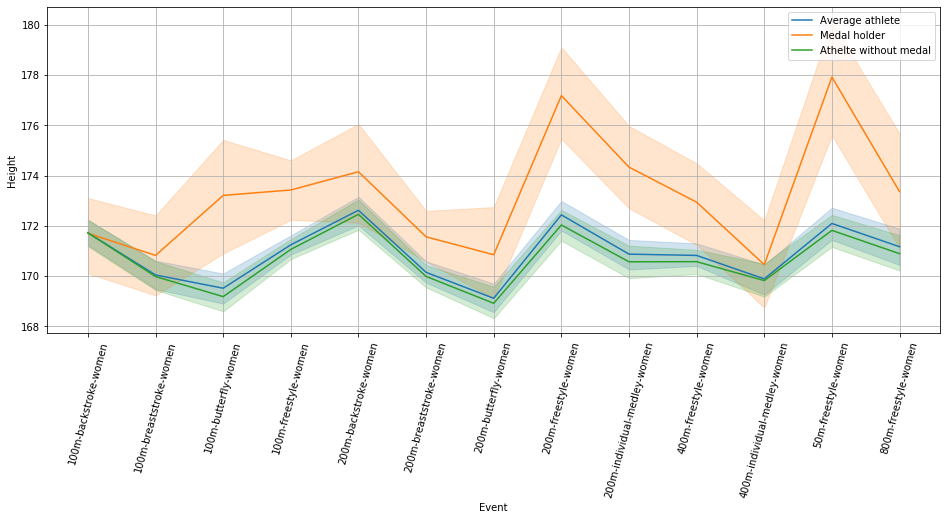

In [39]:
plt.figure(figsize=(16,6))
plt.grid()
plt.xticks(rotation=75)
sns.lineplot(y=df_female.Height, x=df_female.Event, label="Average athlete")
sns.lineplot(y=df_female[df_female.Medal==1].Height, x=df_female[df_female.Medal==1].Event, label="Medal holder")
sns.lineplot(y=df_female[df_female.Medal==0].Height, x=df_female[df_female.Medal==0].Event, label="Athelte without medal")

We can notice tendency, that than shorter distance then height is more important. 
Also we can notice that medal holders in freestyle is higher than medal holders in other styles.
### Let's check the most popular "royal" distance 100m-freestyle

In [55]:
df_female[(df_female.Medal==1)&(df_female.Year==2008)&(df_female.Event=='100m-freestyle-women')]

,ID,Name,Age,Height,Weight,NOC,Year,City,Event,Medal,Games
1168,23426,NATALIE ANNE COUGHLIN (-HALL),25.0,173.0,63.0,USA,2008,beijing,100m-freestyle-women,1,beijing-2008
3473,68741,"LISBETH CONSTANCE ""LIBBY"" LENTON-TRICKETT",23.0,167.0,60.0,AUS,2008,beijing,100m-freestyle-women,1,beijing-2008
5886,114701,BRITTA STEFFEN,24.0,180.0,60.0,GER,2008,beijing,100m-freestyle-women,1,beijing-2008


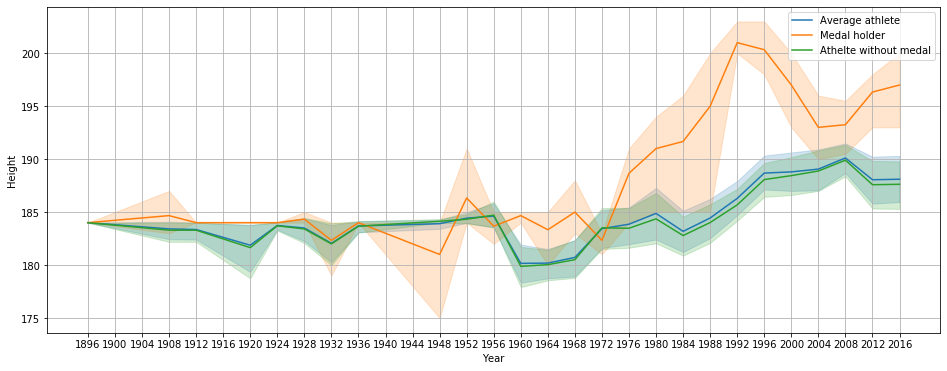

In [40]:
plt.figure(figsize=(16,6))
plt.xticks(np.arange(min(df_male.Year), max(df_male.Year)+1, 4))
plt.grid()
sns.lineplot(y=df_male[df_male.Event=='100m-freestyle-men'].Height, x=df_male.Year, label="Average athlete")
sns.lineplot(y=df_male[(df_male.Medal==1)&(df_male.Event=='100m-freestyle-men')].Height, x=df_male[df_male.Medal==1].Year, label="Medal holder")
sns.lineplot(y=df_male[(df_male.Medal==0)&(df_male.Event=='100m-freestyle-men')].Height, x=df_male[df_male.Medal==0].Year, label="Athelte without medal")

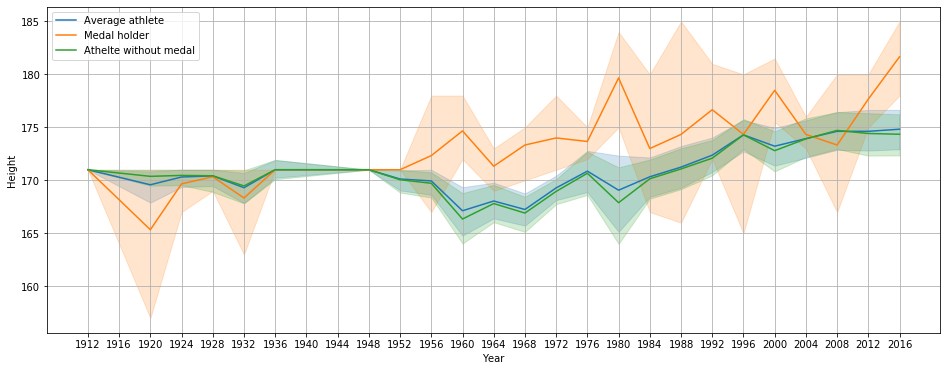

In [41]:
plt.figure(figsize=(16,6))
plt.xticks(np.arange(min(df_female.Year), max(df_female.Year)+1, 4))
plt.grid()
sns.lineplot(y=df_female[df_female.Event=='100m-freestyle-women'].Height, x=df_female.Year, label="Average athlete")
sns.lineplot(y=df_female[(df_female.Medal==1)&(df_female.Event=='100m-freestyle-women')].Height, x=df_female[df_female.Medal==1].Year, label="Medal holder")
sns.lineplot(y=df_female[(df_female.Medal==0)&(df_female.Event=='100m-freestyle-women')].Height, x=df_female[df_female.Medal==0].Year, label="Athelte without medal")

We can notice that every Olympic Games medal holder becomes higher and higher. The fall of height in 2008 connected with fact that it was the first and last Olympic Games where athletes used swimsuits with new type of material. These swimsuits help decrease correlation between height and medal. After this Olympic Games swimsuits were forbidden.

## Download results

Full downloadinfg of results

In [42]:
# results = []
# names = []
# k = 0
# for i in df.Games.unique():
#     for j in df.Event.unique():
#         try:
#             print("https://www.olympic.org/" + i + "/swimming/" + j)
#             results.append(pd.read_html("https://www.olympic.org/" + i + "/swimming/" + j))
#             k += 1
#             names.append("https://www.olympic.org/" + i + "/swimming/" + j)
#             print(k)
#         except:
#             print('got error!')

# Working with results

In [43]:
# for i in range(len(names)):
#     distance = names[i].split('/')
#     for j in range(len(results[i])):
#         try:
#             results[i][j].columns = results[i][j].columns.droplevel()
#         except:
#             pass
#         results[i][j] = results[i][j].drop(['Notes'], axis=1)
#         if results[i][j].columns[1] == 'Athlete':
#             results[i][j] = results[i][j].rename(columns={"Athlete": "Participant"})
#         results[i][j]['Event']=distance[-1]
#         results[i][j]['Year']=distance[-3]

In [44]:
# new = pd.DataFrame()
# for i in range(len(results)):
#     for j in range(len(results[i])):
#         new = new.append(results[i][j], ignore_index=True)

In [45]:
# new = pd.read_csv('results.csv')
# new = new.dropna()

# dropped = new[new.Rank.str.startswith('Rank') | new.Rank.str.startswith('Table')].index
# new = new.drop(dropped, axis=0)

# dropped = new[new.Result.str.startswith('Table')|new.Result.str.startswith('Result')].index
# new = new.drop(dropped, axis=0)

# # new.Year = new.Year.str[-4:]
# # new.Year = pd.to_numeric(new.Year)

# new.Result = new.Result.astype(str)
# new.Result = new.Result.str.replace(':', '.')

# new = new.drop('Unnamed: 0', axis=1)
# new.to_csv('swimming_results.csv')
# new.head()

### Analysis of results

In [46]:
from datetime import datetime

sr = pd.read_csv('swimming_results.csv')

sr = sr.drop('Unnamed: 0', axis=1)
sr.Result = sr.Result.apply(lambda x: datetime.strptime(x, '%M.%S.%f') if x.count('.')>1 else datetime.strptime(x, '%S.%f'))
sr.Result = sr.Result.dt.time
sr.head()

,Rank,Participant,Result,Event,Year
0,G,Jean BOITEUX FRA,00:04:30.700000,400m-freestyle-men,1952
1,S,Ford KONNO USA,00:04:31.300000,400m-freestyle-men,1952
2,B,Per-Olof ÖSTRAND SWE,00:04:35.200000,400m-freestyle-men,1952
3,4.,Peter DUNCAN RSA,00:04:37.900000,400m-freestyle-men,1952
4,5.,John WARDROP GBR,00:04:39.900000,400m-freestyle-men,1952


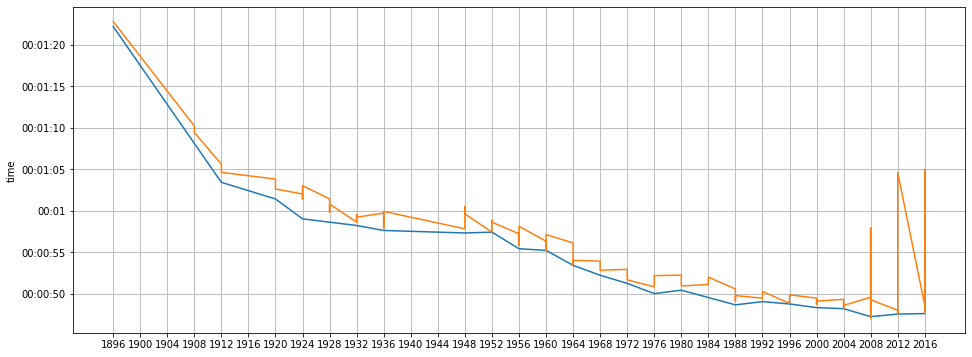

In [47]:
plt.figure(figsize=(16,6))
plt.xticks(np.arange(min(df_male.Year), max(df_male.Year)+1, 4))
plt.grid()
plt.plot(sr.sort_values(by=['Year'])[(sr.Rank=='G')&(sr.Event=='100m-freestyle-men')].Year, sr.sort_values(by=['Year'])[(sr.Rank=='G')&(sr.Event=='100m-freestyle-men')].Result)
plt.plot(sr.sort_values(by=['Year'])[(sr.Rank!='G')&(sr.Event=='100m-freestyle-men')].Year, sr.sort_values(by=['Year'])[(sr.Rank!='G')&(sr.Event=='100m-freestyle-men')].Result)

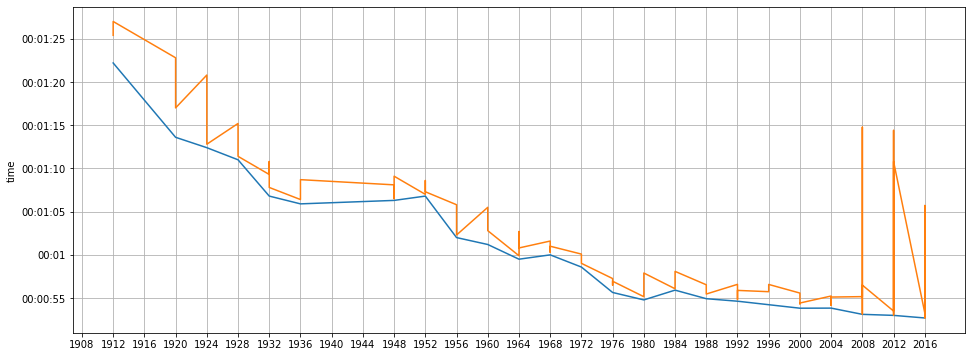

In [48]:
plt.figure(figsize=(16,6))
plt.xticks(np.arange(min(df_male.Year), max(df_male.Year)+1, 4))
plt.grid()
plt.plot(sr.sort_values(by=['Year'])[(sr.Rank=='G')&(sr.Event=='100m-freestyle-women')].Year, sr.sort_values(by=['Year'])[(sr.Rank=='G')&(sr.Event=='100m-freestyle-women')].Result)
plt.plot(sr.sort_values(by=['Year'])[(sr.Rank!='G')&(sr.Event=='100m-freestyle-women')].Year, sr.sort_values(by=['Year'])[(sr.Rank!='G')&(sr.Event=='100m-freestyle-women')].Result)

# Predictions

In [49]:
# sr[(sr.Rank=='G')&(sr.Event=='100m-freestyle-men')]

In [50]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error
# from math import sqrt
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeRegressor


# home_data = sr[(sr.Rank=='G')&(sr.Event=='100m-freestyle-men')]
# y = home_data.Result
# features = list(home_data.select_dtypes(exclude=['object']).columns[:-1])
# X = home_data[features]

# train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# home_model = DecisionTreeRegressor(random_state=1)
# home_model.fit(train_X, train_y)

# val_predictions = home_model.predict(val_X)
# val_rmse = (mean_squared_error(val_predictions, val_y))
# print("Validation rmse when not specifying max_leaf_nodes: {:,.0f}".format(val_rmse))